# Fully Connected Networks

We covered artificial neural networks with multiple hidden layers in class. In this assignment, you will implement Fully Connected Neural Network (FCN) components in order to perform a supervised classification task.

The dataset you are going to work with are : (i) for development of your code, you will use Iris dataset for classification; (ii) for actual training and testing of your implementation in this assignment, the actual dataset will be Twitter tweet data. You will be performing a sentiment classification of tweets into: positive, negative classes.

Usage of any built-in functions for code parts that you are asked to write are not allowed. We provide a skeleton code on which to build on your own architecture. In the Layer class, there are two important methods, named as forward and backward. Almost everything you will use in this assignment is derived from this class. We will follow PyTorch-like architecture in the skeleton code.

**Please do not modify the following cells, except the Twitter sentiment analysis cell. We will use them for the evaluation of your homeworks. **

**You should modify and fill in the code under blg561/layers.py, which includes functions such as layer.NNLayer.* ...**



In [1]:
import numpy as np
from blg561.layer import layer
from blg561.checks import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

### To auto-reload your modules from the *.py files, re run the following cell

In [2]:
%reload_ext autoreload
%autoreload 2

## Layers

In the `Layer` class, there are two important methods, named as `forward` and `backward`. Almost everything you will use in this assignment is derived from this class. You will be programming in Python language.

**Don't forget to test your implementation by using the cells below!**



### a. Affine Layer

In this layer, we basically implement the hidden layers of neural nets. Each neuron (building block of neural networks) is a just logistic regression classifier itself, but stacking these neurons make them powerful to implement any function.
We are going to implement our affine layer 

Go under blg561e/layer.py and find Affine class. Implement the forward pass for Affine layer which is formulated as follows:

$ z = W x + b $ 

#### Forward pass

In [3]:
num_inputs = 10
input_shape = (4, 7, 2) 
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
affineLayer.W = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
affineLayer.b = np.linspace(-0.3, 0.1, num=output_dim)

out = affineLayer.forward(x)
correct_out = np.array([[-0.34448963, -0.15630714,  0.03187535],
       [-0.18626697,  0.0119934 ,  0.21025377],
       [-0.0280443 ,  0.18029394,  0.38863218],
       [ 0.13017836,  0.34859447,  0.56701059],
       [ 0.28840102,  0.51689501,  0.74538901],
       [ 0.44662368,  0.68519555,  0.92376742],
       [ 0.60484634,  0.85349608,  1.10214583],
       [ 0.763069  ,  1.02179662,  1.28052425],
       [ 0.92129166,  1.19009716,  1.45890266],
       [ 1.07951432,  1.35839769,  1.63728107]])


relError = rel_error(out, correct_out)

print('Testing forward method of affine layer:')
print('difference: ', relError)
assert 1e-6 > relError

Testing forward method of affine layer:
difference:  8.825372662436368e-08


### Backward pass : 
Go under blg561e/layer.py and find AffineLayer class. Implement the backward pass for Affine layer.

In [4]:
np.random.seed(1773)
num_inputs = 7
input_shape = (4, 10, 3)
output_dim = 8

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)


x = np.random.randn(10, 2, 3)
affineLayer.W = np.random.randn(6, 5)
affineLayer.b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = grad_check(affineLayer.forward, x, dout)
dw_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.W, dout)
db_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.b, dout)

affineLayer.forward(x)
dx, dw, db = affineLayer.backward(dout)

# Errors should be around 1e-6 at least
print('Testing backward method of affine layer:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

assert 1e-6 > rel_error(dx_num, dx) 
assert 1e-6 > rel_error(dw_num, dw) 
assert 1e-6 > rel_error(db_num, db) 

Testing backward method of affine layer:
dx error:  4.7047248209738234e-09
dw error:  1.0253793048198812e-10
db error:  4.978984658437728e-11


### b. ReLU Layer

Go under `blg561e/layer.py` and find `ReLU` class. Implement the forward pass for ReLU which is basicly zeroing the negative inputs:

$ ReLU(x) = max(x, 0) $

#### Forward pass

In [5]:
relu = layer.ReLU()
x = np.array([0,1,3,4,-1,2,4,1773,-1773, 1.3, .4, -.1]).reshape(3, -1)
out = relu.forward(x)
correct_out = np.array([[0.000, 1.000, 3.000, 4.000],
                       [0.000, 2.000, 4.000, 1773],
                       [0.000, 1.300, 0.4, 0]])

# Compare your output with ours. 
relError = rel_error(out, correct_out)
print('Testing forward method of ReLU layer:')
print('Error: ', rel_error(out, correct_out))
assert 1e-6 > relError

Testing forward method of ReLU layer:
Error:  0.0


#### Backward pass

In [6]:
relu = layer.ReLU()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(relu.forward, x, dout)

relu.forward(x)
dx = relu.backward(dout)

# The error should be around 3e-12
print('Testing backward method of ReLU layer:')
print('dx error: ', rel_error(dx_num, dx))

Testing backward method of ReLU layer:
dx error:  1.0


### c. Softmax classifier 

In multi-class classification task, as we've seen in the class, the softmax loss function is utilized. 
Practically, at the final layer of the network, instead of the standard activation, we utilize softmax function to turn the likelihood of each class into class probablities. Then, we utilize the cross-entropy loss as the data loss. Below, you implement and return only the data loss component in your overall loss. 
*** Implement your loss computation in the function "loss" of the layer.py ***

The L2 regularizer will be added by you in the Optimization phase later.
You will write forward pass and backward pass for the softmax unit. Below, we evaluate your method by a numerical gradient method.

In [7]:
np.random.seed(1773)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

softmax = layer.Softmax()

def softmax_loss (x,y):
    probs = softmax.forward(x)
    dx = softmax.backward(y)
    loss = layer.loss(probs, y) 
    return loss,dx


loss, dx = softmax_loss(x,y)
dx_num = grad_check(lambda x: softmax_loss(x, y)[0], x)

# The loss should be about 2.3
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302478992941877
dx error:  9.563859704669096e-09


### d. Implement your activation (Bonus)
Implement a novel or a recently published activation function and test its correctness below. If you used an activation from a paper, please don't forget to give a reference to it. Make sure that you have the correct implementation of the forward pass so that we can test your backward pass using a numerical gradient.

Also, under this cell, write your activation mathematically and its derivative. Do not forget to use your activation in training part with the Iris data to show that it works and makes sense. You can also plot your activation for litte extra credits.

In [8]:
act = layer.YourActivation()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(act.forward, x, dout)

act.forward(x)
dx = act.backward(dout)

relError = rel_error(dx_num, dx)
print('Testing your activation:')
print('dx error: ', relError)

Testing your activation:
dx error:  5.469181638412024e-12


### e. Optimizers

Implement SGD and SGDWithMomentum Strategies in `VanillaSGDOptimizer` and `SGDWithMomentum` classes. Test their correctness using cell below. 
**Do not forget to add L2 regularization to both optimizers.**

In [9]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
print("not updated dW: ", toyModel[0].dW)
print("not updated W: ", toyModel[0].W)
print()
optimizer = layer.VanillaSGDOptimizer(model=toyModel, lr=1, regularization_str=1e-1)
x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
print("updated dW: ", toyModel[0].dW)
print("updated W: ", toyModel[0].W)

not updated dW:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
not updated W:  [[0.86511762 0.53375678]
 [0.18891077 0.92252601]
 [0.84243421 0.2956638 ]
 [0.42751833 0.52951101]
 [0.56011773 0.08463733]
 [0.39307239 0.15335034]
 [0.52741731 0.76158481]
 [0.21636269 0.85887154]
 [0.13569479 0.78975627]
 [0.92197754 0.49880393]]

updated dW:  [[-0.20012498 -0.33212319]
 [ 3.90737789  4.89035009]
 [ 0.46357517  0.63927459]
 [ 0.14690039  0.20069754]
 [ 1.95672743  2.41624809]
 [ 0.31633803  0.37928763]
 [ 0.21292988  0.16848315]
 [-0.15770393 -0.19136448]
 [-0.05738112 -0.05096073]
 [-0.79761684 -0.98043375]]
updated W:  [[ 0.97873084  0.81250429]
 [-3.7373582  -4.06007668]
 [ 0.29461562 -0.37317717]
 [ 0.23786611  0.27586238]
 [-1.45262147 -2.34007449]
 [ 0.03742712 -0.24127232]
 [ 0.2617457   0.51694319]
 [ 0.35243035  0.96434886]
 [ 0.17950643  0.76174137]
 [ 1.62739663  1.42935729]]


In [10]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.VanillaSGDOptimizer(model=toyModel, lr=1, regularization_str=1e-1)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [ np.array([[ 0.97873084,  0.81250429],
 [-3.7373582,  -4.06007668],
 [ 0.29461562, -0.37317717],
 [ 0.23786611 , 0.27586238],
 [-1.45262147, -2.34007449],
 [ 0.03742712, -0.24127232],
 [ 0.2617457 ,  0.51694319],
 [ 0.35243035,  0.96434886],
 [ 0.17950643,  0.76174137],
 [ 1.62739663,  1.42935729]]),
np.array([-0.23634795, -0.22072128]),
np.array([[-0.53813187, -0.23883808, -0.09825078],
 [-1.90591288, -1.13402054, -0.4392717 ]]),
np.array([-0.34588157, -0.00713497,  0.35301654])]


In [11]:
student_out = []
for i in range(2):
    student_out.append( toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

Testing Weights of 0th layer
Testing biases of 1th layer
Testing Weights of 0th layer
Testing biases of 1th layer


In [12]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.SGDWithMomentum(model=toyModel, lr=1, regularization_str=1e-1, mu=.5)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [np.array([[ 0.97873084,  0.81250429],
        [-3.7373582 , -4.06007668],
        [ 0.29461562, -0.37317717],
        [ 0.23786611,  0.27586238],
        [-1.45262147, -2.34007449],
        [ 0.03742712, -0.24127232],
        [ 0.2617457 ,  0.51694319],
        [ 0.35243035,  0.96434886],
        [ 0.17950643,  0.76174137],
        [ 1.62739663,  1.42935729]]),
 np.array([-0.23634795, -0.22072128]),
 np.array([[-0.53813187, -0.23883808, -0.09825078],
        [-1.90591288, -1.13402054, -0.4392717 ]]),
 np.array([-0.34588157, -0.00713497,  0.35301654])]
    
    


In [13]:
student_out = []
for i in range(2):
    student_out.append( toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

Testing Weights of 0th layer
Testing biases of 1th layer
Testing Weights of 0th layer
Testing biases of 1th layer


## f. Build your own model!

Below is an example which is implemented using previously defined API. In this example, you will use the widely known IRIS dataset.

In [14]:
from sklearn import preprocessing
from sklearn.datasets import load_iris  # Load dataset
data = load_iris()
X, y = data.data, data.target
model = layer.Model() # Create a model instance
 
# Iris dataset has 4 features, so the input size of first layer is 4. We have 3 classes, so size of last hidden is 3. 
# Each neuron corresponds the likelihood of a class, named P(y=neuron_index|x), where y is class label 
# and x is features given.
layers = [layer.AffineLayer(4,64), layer.ReLU(), layer.AffineLayer(64,3), layer.Softmax()]

model(layers) # Load layers to model object
predictions  = np.ones(150)
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Shuffle dataset
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index =  int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 0
n_epochs = 1200
train_test_split_ratio = .2
print_every = 50
test_every = 200
if preprocessing_on:
    X = preprocessing.scale(X)
X_train, y_train, X_test, y_test = train_test_split(X, y)

optimizer = layer.SGDWithMomentum(model,lr=1e-1, regularization_str=regularization_strength)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)
    softmax_out = model.forward(X_train)

    predictions = np.argmax(softmax_out, axis=1)
    train_acc = np.mean(predictions == y_train)
    loss = layer.loss(softmax_out, y_train)
    
    train_accs.append(train_acc)
    train_losses.append(loss)
    
    if epoch % print_every == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))
    
    model.backward(y_train)
    optimizer.optimize()
    
    if epoch % test_every == 0:
        softmax_out = model.forward(X_test)
        predictions = np.argmax(softmax_out, axis=1)
        loss = layer.loss(softmax_out, y_test)
        test_acc = np.mean(predictions == y_test)
        test_losses.append(loss)
        test_accs.append([test_acc for i in range(test_every)])
        print("Epoch: {}, Test Loss: {}, Test Accuracy: {}".format(epoch, loss, test_acc))

Epoch: 0, Loss: 1.1370605717222104, Accuracy: 0.4666666666666667
Epoch: 0, Test Loss: 0.8965310439855209, Test Accuracy: 0.6
Epoch: 50, Loss: 0.3115177206831336, Accuracy: 0.8666666666666667
Epoch: 100, Loss: 0.251912462999947, Accuracy: 0.9083333333333333
Epoch: 150, Loss: 0.21244492936133028, Accuracy: 0.9333333333333333
Epoch: 200, Loss: 0.18254428808226386, Accuracy: 0.9583333333333334
Epoch: 200, Test Loss: 0.16915791360361254, Test Accuracy: 0.9333333333333333
Epoch: 250, Loss: 0.15873641555406737, Accuracy: 0.975
Epoch: 300, Loss: 0.1399947780868566, Accuracy: 0.975
Epoch: 350, Loss: 0.12529172075817746, Accuracy: 0.975
Epoch: 400, Loss: 0.11369779748337157, Accuracy: 0.975
Epoch: 400, Test Loss: 0.12897125522871297, Test Accuracy: 0.9333333333333333
Epoch: 450, Loss: 0.10444060335762619, Accuracy: 0.975
Epoch: 500, Loss: 0.09690933660497027, Accuracy: 0.975
Epoch: 550, Loss: 0.09071681572285639, Accuracy: 0.975
Epoch: 600, Loss: 0.08554138228757249, Accuracy: 0.975
Epoch: 600, 

### Plot the training and test loss curves for diagnostics below:

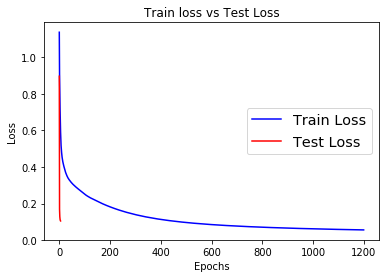

In [15]:
len_train = range(len(train_losses))
len_test = range(len(test_losses))
fig, ax = plt.subplots()
ax.plot(len_train, train_losses, label='Train Loss', color='blue')
ax.plot(len_test, test_losses, label='Test Loss', color = 'red')
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train loss vs Test Loss')
plt.show()

### Twitter Sentiment Analysis 

Now, in this part, you will work with Twitter tweet text data (http://help.sentiment140.com/for-students) for sentiment analysis. The tweets come in two classes:  Class label = 1: Positive tweet; Class label = 0: Negative tweet.  Below, we pre-processed for easier processing.
Load the tweet text files by the given code below. You will need to use batch-wise optimizer  since it is almost impossible to fit all the data at once.

**IMPORTANT: You are NOT allowed to use sklearn or any other implementations for the learning part
. You are ALLOWED ONLY TO USE your own implementation from the above steps.**

In [ ]:
# Read tweets
csv = 'homework_ds.csv'
my_small_df = pd.read_csv(csv,index_col=0)[:150000]

# If you would like to use more tweets, you can increase the number of samples (150K) but it will not affect the grading.

### Convert the text data to tfidf vectors with our parameters, whose code is also given below. We split the data into Training (120K), Validation (10K) and Test (20K)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(max_features=2000)
data, labels = my_small_df['tweet'], my_small_df['class']
x_tfidf = np.array(tvec.fit_transform(data).todense())
x_train = x_tfidf[:120000]
y_train = labels[:120000]
x_test = x_tfidf[120000:140000]
y_test = labels[120000:140000]
x_val = x_tfidf[140000:]
y_val = labels[140000:]


**You will use your implementations (layers.py) below to carry out the classification of each tweet vector into two classes (Positive/Negative). Construct your model with all its layers in the cell below.**

In [ ]:
# I did not run the cell below on my local machine, so there's no cell output from it. 
# However they're given below on a seperate cell.
model = layer.Model() # 
regularization_strength = 1e-3
momentum = .95
learning_rate = 1e-4
n_epochs = 700
print_every = 10
test_every = 20
number_layers = 64
number_features = 2000
number_classes = 2
shuffle_on_each_epoch = False 


layers = [layer.AffineLayer(2000, 256), layer.ReLU(), layer.AffineLayer(256, 256), layer.ReLU(), layer.AffineLayer(256, 2), layer.Softmax()]


model(layers) # Load layers to model object
predictions  = np.ones(150)
train_accs = []
test_accs = []
val_accs = []
train_losses = []
test_losses = []
val_losses = []
optimizer = layer.SGDWithMomentum(model,lr=learning_rate, regularization_str=regularization_strength, mu=momentum)

from sklearn.preprocessing import normalize
for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
            x_train, y_train = create_permutation(x_train, y_train)
    softmax_out = model.forward(x_train)
    predictions = np.argmax(softmax_out, axis=1)
    train_acc = np.mean(predictions == y_train)
    loss = layer.loss(softmax_out, y_train)
        
    train_accs.append(train_acc)
    train_losses.append(loss)
        
    if epoch % print_every == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))
            
    model.backward(y_train)
    optimizer.optimize()
        
    if epoch % test_every == 0:
        softmax_out = model.forward(x_val)
        predictions = np.argmax(softmax_out, axis=1)
        loss = layer.loss(softmax_out, y_val)
        val_acc = np.mean(predictions == y_val)
        val_losses.append(loss)
        val_accs.append([val_acc for i in range(test_every)])
        print("Epoch: {}, Val Loss: {}, Val Accuracy: {}".format(epoch, loss, val_acc))



### Run diagnostics of your model : Try different hyperparameter settings such as number of layers in your model, learning rate, regularization parameter and such. Also, try using an L1 regularizer or other regularizer you may come up with. 
### Compare the outcomes. Avoid overfitting and underfitting as much as possible.  
### We expect you to get at least 75% Test Accuracy**

In [16]:
# Since I ran all the models on a remote machine, I saved the necassary values and here we're importing all of them.
version_1 = np.load('/home/ooa/Belgeler/courses/Deep Learning/blg561-hw1-studentversion/V1.npz')
version_2 = np.load('/home/ooa/Belgeler/courses/Deep Learning/blg561-hw1-studentversion/V2.npz')
version_3 = np.load('/home/ooa/Belgeler/courses/Deep Learning/blg561-hw1-studentversion/V3.npz')
version_4 = np.load('/home/ooa/Belgeler/courses/Deep Learning/blg561-hw1-studentversion/V4.npz')
version_5 = np.load('/home/ooa/Belgeler/courses/Deep Learning/blg561-hw1-studentversion/V5.npz')
version_6 = np.load('/home/ooa/Belgeler/courses/Deep Learning/blg561-hw1-studentversion/V6.npz')
version_7 = np.load('/home/ooa/Belgeler/courses/Deep Learning/blg561-hw1-studentversion/V7.npz')
version_8 = np.load('/home/ooa/Belgeler/courses/Deep Learning/blg561-hw1-studentversion/V8.npz')

training_loss_v1 = version_1['tl']
training_loss_v2 = version_2['tl']
training_loss_v3 = version_3['tl']
training_loss_v4 = version_4['tl']
training_loss_v5 = version_5['tl']
training_loss_v6 = version_6['tl']
training_loss_v7 = version_7['tl']
training_loss_v8 = version_8['tl']
val_loss_v1 = version_1['vl']
val_loss_v2 = version_2['vl']
val_loss_v3 = version_3['vl']
val_loss_v4 = version_4['vl']
val_loss_v5 = version_5['vl']
val_loss_v6 = version_6['vl']
val_loss_v7 = version_7['vl']
val_loss_v8 = version_8['vl']

val_acc_v1 = version_1['va']
val_acc_v2 = version_2['va']
val_acc_v3 = version_3['va']
val_acc_v4 = version_4['va']
val_acc_v5 = version_5['va']
val_acc_v6 = version_6['va']
val_acc_v7 = version_7['va']
val_acc_v8 = version_8['va']

training_acc_v1 = version_1['ta']
training_acc_v2 = version_2['ta']
training_acc_v3 = version_3['ta']
training_acc_v4 = version_4['ta']
training_acc_v5 = version_5['ta']
training_acc_v6 = version_6['ta']
training_acc_v7 = version_7['ta']
training_acc_v8 = version_8['ta']

# The best model is the 8th model. So we're going to use it for test data. 

### Plot the weights of affine layers to see whether the weights vanish or not and comment.

### Plotting the training and validation losses versus number of iterations as we vary the number of layers

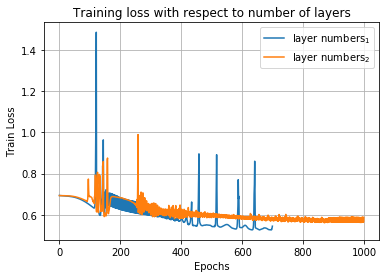

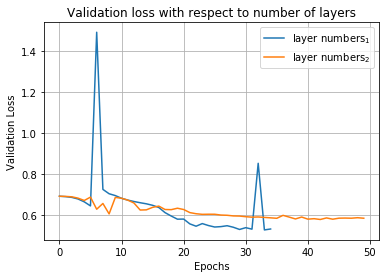

In [17]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(training_loss_v1)), training_loss_v1, label='layer numbers$_1$')
ax.plot(range(len(training_loss_v2)), training_loss_v2, label='layer numbers$_2$')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Training loss with respect to number of layers')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(val_loss_v1)), val_loss_v1, label='layer numbers$_1$')
ax.plot(range(len(val_loss_v2)), val_loss_v2, label='layer numbers$_2$')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation loss with respect to number of layers')
plt.grid(True)
plt.show()


### Plot the training and validation losses versus number of iterations, as you vary the regularization parameter lambda with different colors

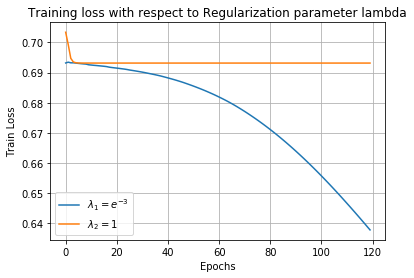

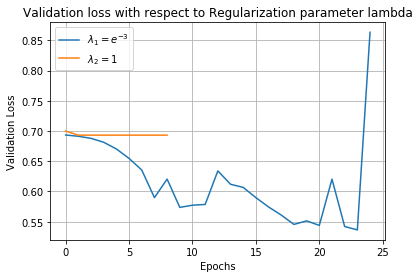

In [18]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(training_loss_v5[:120])), training_loss_v5[:120], label='$\lambda_1 = e^{-3}$')
ax.plot(range(len(training_loss_v6[:120])), training_loss_v6[:120], label='$\lambda_2 = 1$')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Training loss with respect to Regularization parameter lambda')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(val_loss_v5)), val_loss_v5, label='$\lambda_1 = e^{-3}$')
ax.plot(range(len(val_loss_v6)), val_loss_v6, label='$\lambda_2 = 1$')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation loss with respect to Regularization parameter lambda')
plt.grid(True)
plt.show()


### Plot the training and validation losses vs L1 and L2 Regularization and with L2 regularization multiplied by 2

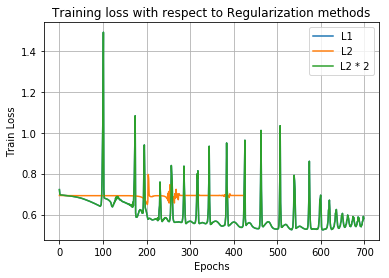

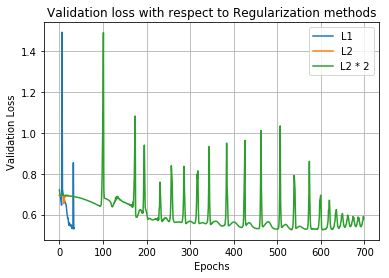

In [19]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(training_loss_v1)), training_loss_v8, label='L1')
ax.plot(range(len(training_loss_v7)), training_loss_v7, label='L2')
ax.plot(range(len(training_loss_v8)), training_loss_v8, label='L2 * 2')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Training loss with respect to Regularization methods')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(val_loss_v1)), val_loss_v1, label='L1')
ax.plot(range(len(val_loss_v7)), val_loss_v7, label='L2')
ax.plot(range(len(training_loss_v8)), training_loss_v8, label='L2 * 2')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation loss with respect to Regularization methods')
plt.grid(True)
plt.show()

### Plot the training and validation losses as you vary the Learning Parameter alpha

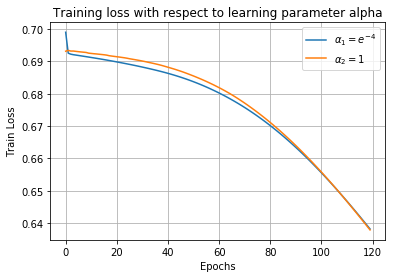

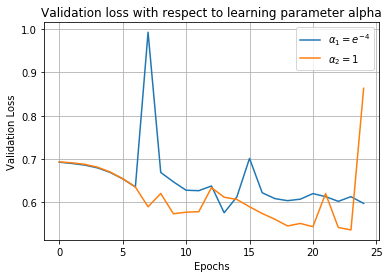

In [20]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(training_loss_v4[:120])), training_loss_v4[:120], label='$\\alpha_1 = e^{-4}$')
ax.plot(range(len(training_loss_v5[:120])), training_loss_v5[:120], label='$\\alpha_2 = 1$')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Training loss with respect to learning parameter alpha')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(val_loss_v4)), val_loss_v4, label='$\\alpha_1 = e^{-4}$')
ax.plot(range(len(val_loss_v5)), val_loss_v5, label='$\\alpha_2 = 1$')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation loss with respect to learning parameter alpha')
plt.grid(True)
plt.show()


### Use two different optimizers: Mini-batch SGD and Mini-batch SGD with Momentum, and plot training and validation losses versus Iteration numbers

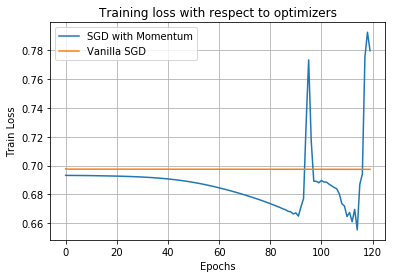

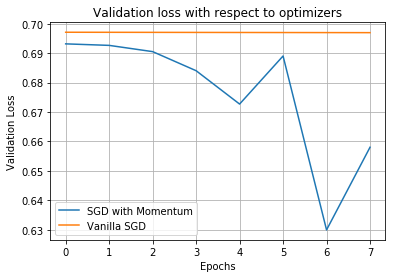

In [21]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(training_loss_v2[:120])), training_loss_v2[:120], label='SGD with Momentum')
ax.plot(range(len(training_loss_v3[:120])), training_loss_v3[:120], label='Vanilla SGD')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Training loss with respect to optimizers')
plt.grid(True)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(val_loss_v2[:8])), val_loss_v2[:8], label='SGD with Momentum')
ax.plot(range(len(val_loss_v3)), val_loss_v3, label='Vanilla SGD')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation loss with respect to optimizers')
plt.grid(True)
plt.show()

### Finally, fix your model and hyperparameters. Plot accuracy of your classification for training, validation set and Test set. 

In [22]:
flat_list = [item for sublist in val_acc_v8 for item in sublist]

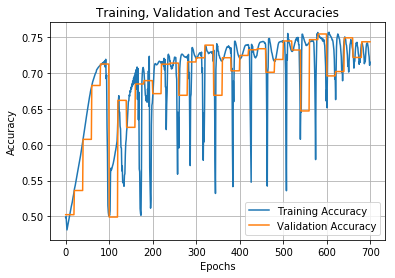

In [23]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(training_acc_v8)), training_acc_v8, label='Training Accuracy')
ax.plot(range(len(flat_list)), flat_list, label='Validation Accuracy')
ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation and Test Accuracies')
plt.grid(True)
plt.show()
